# Szyfry strumieniowe oparte o rejestry przesuwające z sprzeżeniem zwrotnym

Rejestr przesuwający to każda konstrukcja składająca sie z uporządkowanych liniowo komórek pamięci, w której w takt pracy zegara zawartości komórek pamięci jest kopiowana synchronicznie do najbliższych sąsiadów. Rejestr przesuwający może być zrealizowany programowo (nawet na tablicy), ale najczęściej implementuje się je sprzętowo przy użyciu przerzutników (https://pl.wikipedia.org/wiki/Przerzutnik).
Ponieważ w każdym cyklu zegara zawartości komórek przesuwają się w prawo (lub w lewo) to pierwsza komórka pamięci z lewej strony (lub z prawej) opróżnia się. Aby zapewnić poprawną pracę rejestru należy dostarczać do tej komórki odpowiednią zawartość. Można to robić przy pomocy sprzężenia zwrotnego czyli użycia kilku lub wszystkich komórek pamięci oraz pewnej funkcji do wyliczenia wartości wprowadzanej do rejestru.
Rejestry ze sprzężeniem zwrotnym (_feedback shifting registers_) posiadają zdolność do produkowania chaotycznie wyglądających sekwencji danych.

![fsr-stream.svg](attachment:fsr-stream.svg)

# Wprowadzenie

Linear-feedback shift register (LFSR)  
Rejestr przesuwający z liniowym sprzężeniem zwrotnym  
Rejestr przesuwający, którego bit wejściowy jest funkcją liniową jego poprzedniego stanu  

Na zdjęciach poniżej można zobaczyć jak dla 5bitowego rejestru xorowane są 4 wartości w nową wartość, która staje się bitem początkowym.

![State1](assets/l1.png "State 1")
![State2](assets/l2.png "State 2")

Najważniejszym elementem w LFSR są wielomiany pierwotne oraz operacja XOR. Operacja XOR umożliwa rozkład zer i jedynek porównywalny do poziomu 50%. Wielomiany pierwotne zgodnie z algebrą będą generowały najdłuższe możliwe okresy przez co generowany strumień będzie bardziej losowy.

Przykładowa inicjalizacja obiektu, z przejściem do kolejnego stanu.
Należy zdefiniować stan początkowy dla rejestru oraz które wartości rejestru będą uwzględniane w sprzężeniu zwrotnym (_Feedback polynomial_)
Przy inicjalizacji _Output bit_ i _Feedback bit_ nie istnieją dlatego mają wartość -1.

Obiekt rejestru przechowuje wszystkie potrzebne informacje. Między innymi o bicie wychodzącym, bicie sprzężającym i aktualnym stanie rejestru.

Instalacja biblioteki:
```bash
pip install pylfsr
```


In [2]:
%pip install pylfsr

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pylfsr import LFSR

state=[1,1,1,0,1]
polynomial=[5,4,2,1]
L=LFSR(initstate=state, fpoly=polynomial, verbose=True)

L.info()
L.next()


L.runKCycle(10)
L.runFullCycle()


5-bit LFSR with feedback polynomial  x^5 + x^4 + x^2 + x^1 + 1 with
Expected Period (if polynomial is primitive) =  31
Computing configuration is set to Fibonacci with output sequence taken from 5-th (-1) register
Current :
 State        :  [1 1 1 0 1]
 Count        :  0
 Output bit   :  -1
 feedback bit :  -1
S:  [1 1 1 0 1]
S:  [1 1 1 1 0]
S:  [1 1 1 1 1]
S:  [0 1 1 1 1]
S:  [1 0 1 1 1]
S:  [1 1 0 1 1]
S:  [0 1 1 0 1]
S:  [0 0 1 1 0]
S:  [1 0 0 1 1]
S:  [1 1 0 0 1]
S:  [1 1 1 0 0]
S:  [0 1 1 1 0]
S:  [0 0 1 1 1]
S:  [0 0 0 1 1]
S:  [0 0 0 0 1]
S:  [1 0 0 0 0]
S:  [1 1 0 0 0]
S:  [0 1 1 0 0]
S:  [1 0 1 1 0]
S:  [0 1 0 1 1]
S:  [1 0 1 0 1]
S:  [0 1 0 1 0]
S:  [0 0 1 0 1]
S:  [1 0 0 1 0]
S:  [0 1 0 0 1]
S:  [0 0 1 0 0]
S:  [0 0 0 1 0]
S:  [1 0 0 0 1]
S:  [0 1 0 0 0]
S:  [1 0 1 0 0]
S:  [1 1 0 1 0]
S:  [1 1 1 0 1]
S:  [1 1 1 1 0]
S:  [1 1 1 1 1]
S:  [0 1 1 1 1]
S:  [1 0 1 1 1]
S:  [1 1 0 1 1]
S:  [0 1 1 0 1]
S:  [0 0 1 1 0]
S:  [1 0 0 1 1]
S:  [1 1 0 0 1]
S:  [1 1 1 0 0]


C:\Users\jezow\AppData\Local\Temp\ipykernel_14400\1198158214.py:12: DeprecationWarning: function runFullCycle will be deprecated in future version, due to misnomer, use "runFullPeriod" instead.
  L.runFullCycle()


array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0])


Rejestr przesuwny stosuje się w celu genereowania pseudolosowych liczb.   

Interesuje nas okresowość rejestrów. Najlepiej jak jest maksymalny.   
Maksymalny okres dla danego rejestru to taki, gdzie stowarzyszony z nim wielomian jest wielomianem pierwotnym.   
W odniesieniu do rejestru przesuwnego ten _wielomian_ wskazuje które bity należy ze sobą XOR-ować, żeby uzyskać _feedback bit_.  
Nie ważne jaki będzie stan inicjalizacyjny bo wielomian pierowtny sprawi, że rejestr przejdzie przez wszystkie możliwe stany.  

Ilość wielomianów pierwotnych dla zadanej długości można obliczyć z funkcji Eulera.   
Lub wyciągnąć ją z odpowiedniej funkcji w bibliotece :)    
Natomiast w internecie można znaleźć rozpisaną listę wielomianów pierwotnych do 32 potęgi.  
[partow.net/programming/polynomials](https://www.partow.net/programming/polynomials/index.html)  

Zgodnie z algebrą takie wielomiany gwarantują maksymalny okres przez co są najlepszym rozwiązaniem w rejestrach przesuwnych.  
Funkcja _get_fpolyList()_ zawiera listę wielomianów.


In [4]:
# Lista wszystkich możliwych wielomianów pierwotnych do 32 potęgi

fpolyDict = L.get_fpolyList()
print(fpolyDict)

# Lista możliwych wielomianów pierwotnych dla danej potęgi
fpolys = L.get_fpolyList(m=7)
print(fpolys)

{2: [[2, 1]], 3: [[3, 1]], 4: [[4, 1]], 5: [[5, 2], [5, 4, 2, 1], [5, 4, 3, 2]], 6: [[6, 1], [6, 5, 2, 1], [6, 5, 3, 2]], 7: [[7, 1], [7, 3], [7, 3, 2, 1], [7, 4, 3, 2], [7, 5, 4, 3, 2, 1], [7, 6, 3, 1], [7, 6, 4, 2], [7, 6, 5, 2], [7, 6, 5, 4, 2, 1]], 8: [[8, 4, 3, 2], [8, 5, 3, 1], [8, 6, 4, 3, 2, 1], [8, 6, 5, 1], [8, 6, 5, 2], [8, 6, 5, 3], [8, 7, 6, 1], [8, 7, 6, 5, 2, 1]], 9: [[9, 4], [9, 5, 3, 2], [9, 6, 4, 3], [9, 6, 5, 3, 2, 1], [9, 6, 5, 4, 2, 1], [9, 7, 6, 4, 3, 1], [9, 8, 4, 1], [9, 8, 5, 4], [9, 8, 6, 5], [9, 8, 6, 5, 3, 1], [9, 8, 7, 2], [9, 8, 7, 3, 2, 1], [9, 8, 7, 6, 5, 1], [9, 8, 7, 6, 5, 3]], 10: [[10, 3], [10, 4, 3, 1], [10, 6, 5, 3, 2, 1], [10, 8, 3, 2], [10, 8, 4, 3], [10, 8, 5, 1], [10, 8, 5, 4], [10, 8, 7, 6, 5, 2], [10, 8, 7, 6, 5, 4, 3, 1], [10, 9, 4, 1], [10, 9, 6, 5, 4, 3, 2, 1], [10, 9, 8, 6, 3, 2], [10, 9, 8, 6, 5, 1], [10, 9, 8, 7, 6, 5, 4, 3]], 11: [[11, 2], [11, 5, 3, 1], [11, 5, 3, 2], [11, 6, 5, 1], [11, 7, 3, 2], [11, 8, 5, 2], [11, 8, 6, 5, 4, 1], [

Jak działa rejestr przesuwny w akcji. Poniżej został zdefiniowany prosty 4 bitowy rejestr.  
Każdy stan jest wypisywany razem z aktualnym bitem wyjściowym oraz zwrotnym. _Feedback bit_ wchodzi na początek rejestru a _Output bit_ opuszcza go.  
Na sam koniec jest sprawdzona proporcja zer i jedynek. Jest bliska 50% - tak jak powinno być.  

In [5]:
state=[1,1,1,0]
# Sprawdzenie wielomianów pierwotnych dla m=4
# print(L.get_fpolyList(m=4)) # [4,1]

polynomial=[4,1]
L=LFSR(initstate=state, fpoly=polynomial, verbose=True)

out=''

print(f'feedback bit {L.feedbackbit} | ', end='')
for _ in range(2**(len(state)) - 1):
    L.next()
    print(f'feedback bit {L.feedbackbit} | ', end='')
    out += ''.join(str(L.outbit))

print('S: ', L.state) # Powrót do pierwszego stanu po przejściu całego okresu

print('output bits', out)

print('number of 0s: ', out.count('0'))
print('number of 1s: ', out.count('1'))

feedback bit -1 | S:  [1 1 1 0]
feedback bit 1 | S:  [1 1 1 1]
feedback bit 0 | S:  [0 1 1 1]
feedback bit 1 | S:  [1 0 1 1]
feedback bit 0 | S:  [0 1 0 1]
feedback bit 1 | S:  [1 0 1 0]
feedback bit 1 | S:  [1 1 0 1]
feedback bit 0 | S:  [0 1 1 0]
feedback bit 0 | S:  [0 0 1 1]
feedback bit 1 | S:  [1 0 0 1]
feedback bit 0 | S:  [0 1 0 0]
feedback bit 0 | S:  [0 0 1 0]
feedback bit 0 | S:  [0 0 0 1]
feedback bit 1 | S:  [1 0 0 0]
feedback bit 1 | S:  [1 1 0 0]
feedback bit 1 | S:  [1 1 1 0]
output bits 011110101100100
number of 0s:  7
number of 1s:  8


Narzędzie umożliwia również wizualizację każdego stanu.  Poniżej można wygenerować każdy stan i zobaczyc jak się zmieniał.

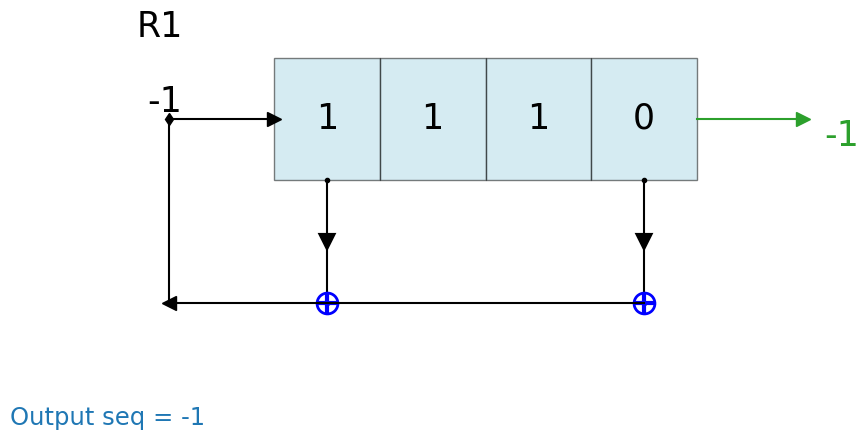

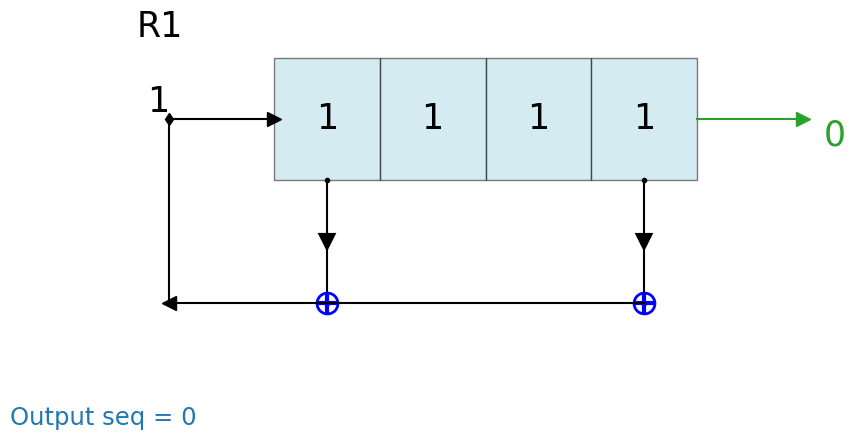

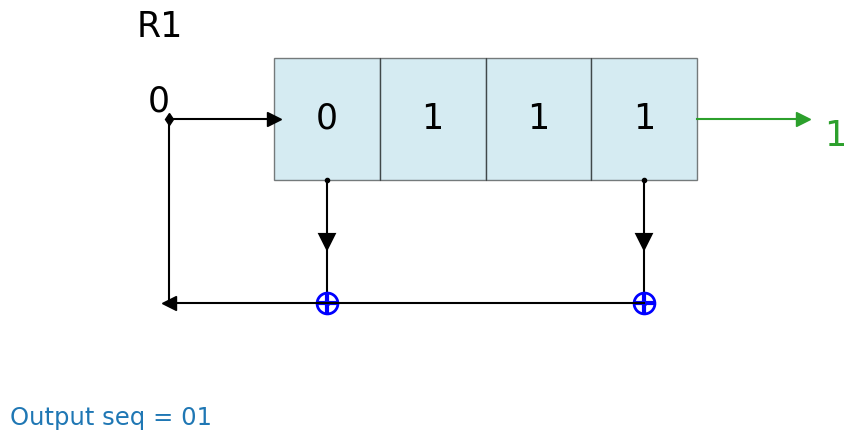

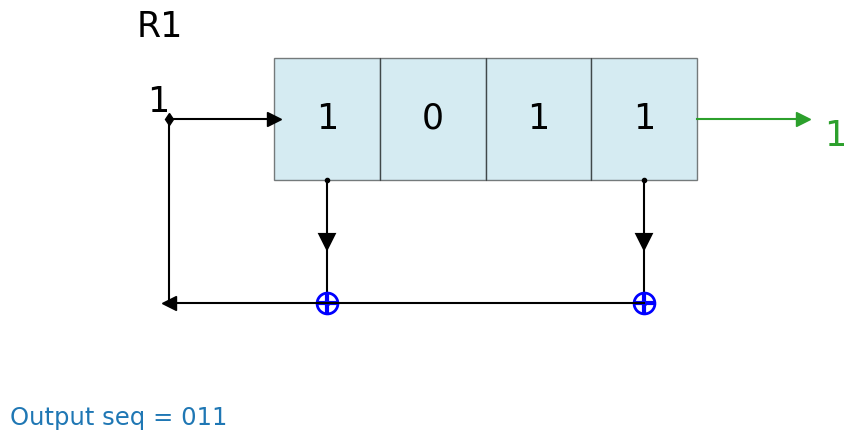

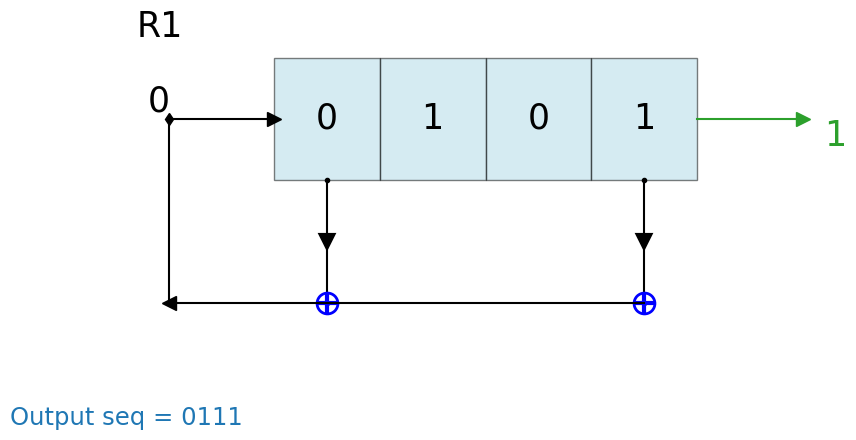

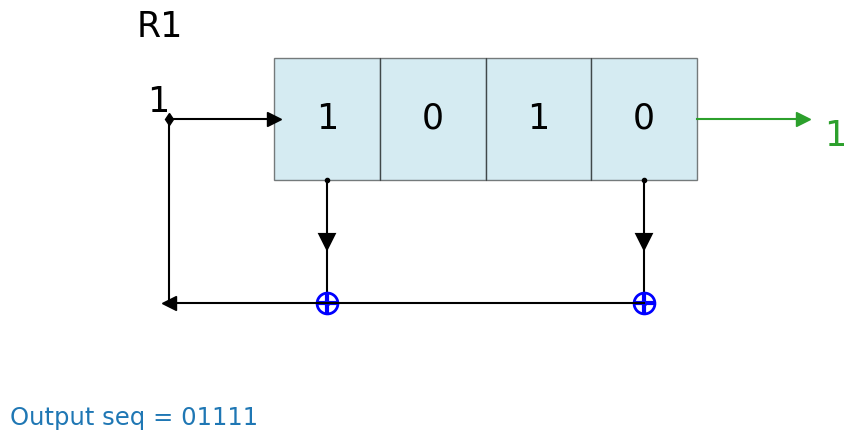

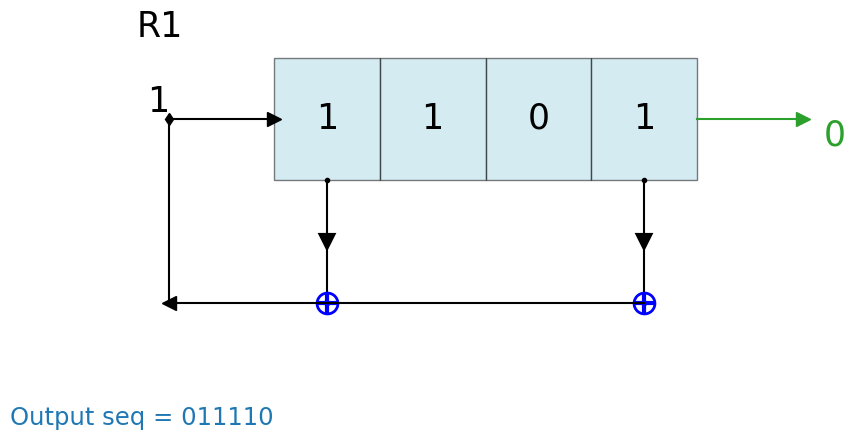

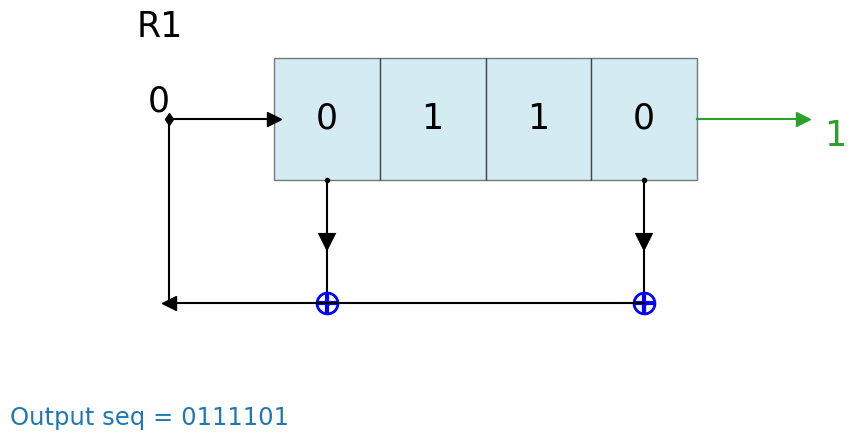

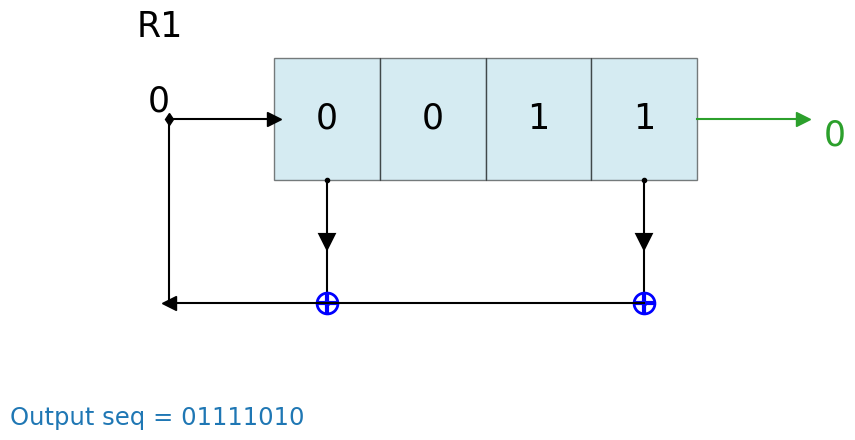

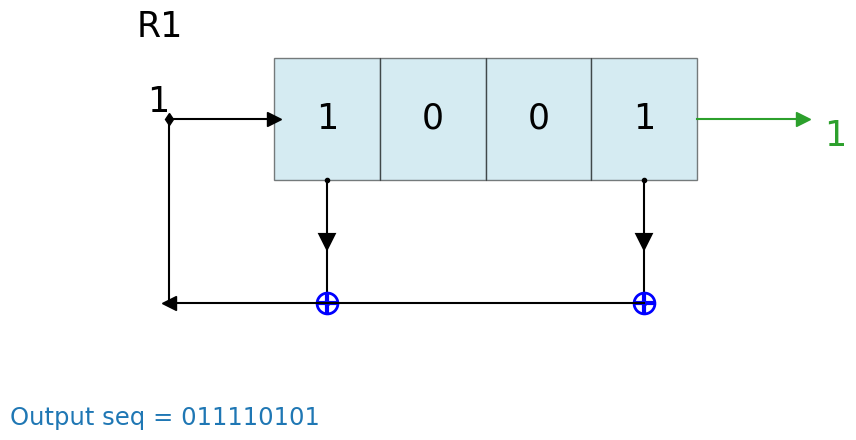

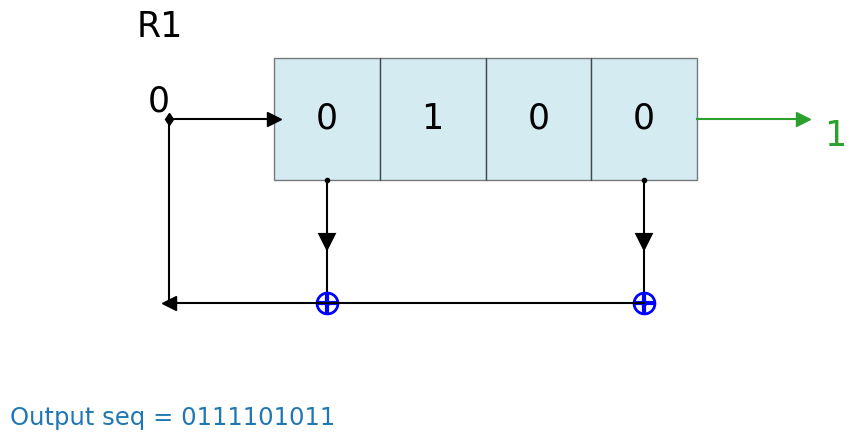

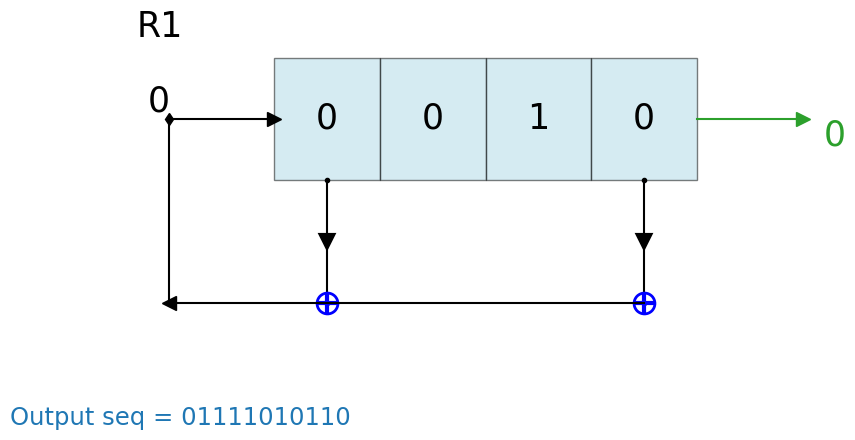

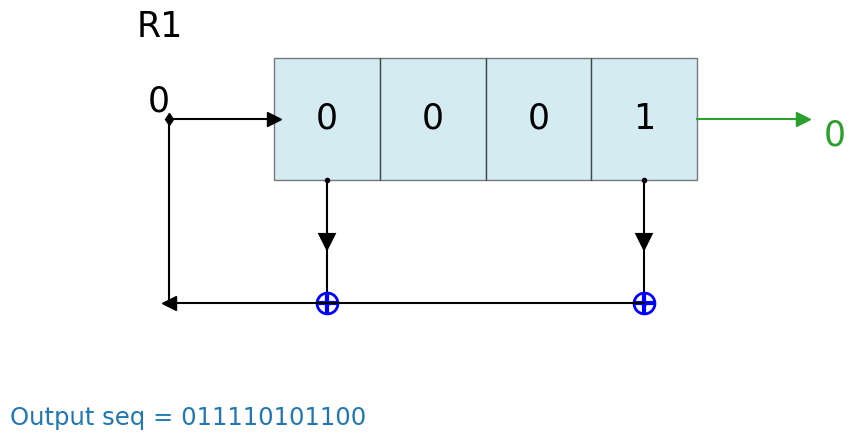

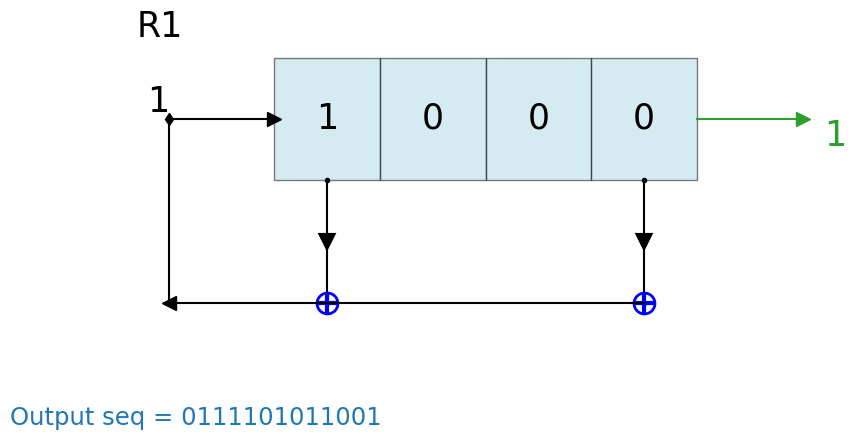

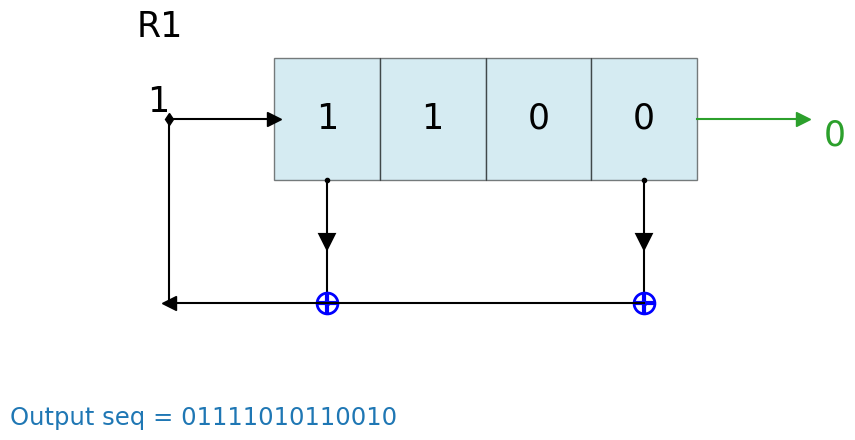

In [6]:
L=LFSR(initstate=[1,1,1,0], fpoly=[4,1])

for _ in range(15):
  L.Viz(title='R1')
  L.next()


Sposób wizualizacji każdego stanu proponowany w [dokumentacji](https://lfsr.readthedocs.io/en/latest/LFSR_Examples.html#example-7-1-visualize-3-bit-lfsr-at-each-step-with-default-counter-start-zero-true)

In [ ]:
L=LFSR(initstate=[1,1,1,0], fpoly=[4,1])
print('count \t state \t\toutbit \t seq')
print('-'*50)
for _ in range(15):
    print(L.count,L.state,'',L.outbit,L.seq,sep='\t')
    L.next()
print('-'*50)
print('Output: ',L.seq)

## Testowanie wielomianów pierwotnych
Funkcja _test_properties()_ sprawdzi dla danego stanu rejestru i zaproponowanego wielomianiu czy generuje on dobry losowy ciąg. Pierwszym, historycznym podejściem do sformułowania metod oceny PRNG były postulaty Golomba:
1) W cyklu sN (sekwencja okresowa) liczba jedynek różni się od liczby zer o co najwyżej jeden
2) W cyklu sN przynajmniej połowa podsekwencji złożona z tych samych bitów ma długość 1, 1/4 długość 2, 1/8 długość 3, itd. aż przekroczymy długość sekwencji; wśród tych podsekwecji powinno prawie tyle samo złożonych z zer i z jedynek
3) Autokorelacja mierzy jest miarą podobieństwa między sekwencją $s$ i jej przesunięciem o $t$ pozycji. Funkcja autokorelacji powinna przyąć tylko dwie wartości: $N$, jeśli przesunięcie wynosi 0 oraz $K$, dla każdego innego przesunięcia, gdzie K jest pewną liczbą całkowitą.

$C(t) = \frac{1}{N} \sum_{n=0}^{N-1} a_n \oplus a_{n+t}$

Sekwencję spełniającą postulaty Golomba nazywamy sekwencją $pn$ (ang, pseudo-noise
seąuence). Postulaty Gołomba są przykładem warunków jaki musi spełnić sekwencja, aby została uznana za losową.

1. Periodicity
------------------
 - Expected period = 2^M-1 = 15
 - Pass?:  False

2. Balance Property
-------------------
 - Number of 1s = Number of 0s+1 (in a period)
 - #1s =  10 	#0s =  5 := 10 = 1 + 5
 - Pass?:  False

3. Runlength Property
-------------------
 - Number of Runs of different lengths in a period should be of specific order, e.g. [4,2,1,1], that is 4 runs of length 1, 2 runs of length 2 and so on ..
 - Runs:  [1 3 0 2]
 - Pass?:  False

4. Autocorrelation Property
-------------------
 - Autocorrelation of a period should be noise-like, specifically, 1 at k=0, -1/m everywhere else 

 - Rxx(k):  [ 1.     0.2   -0.333 -0.067 -0.067  0.2    0.467 -0.067 -0.067  0.467
  0.2   -0.067 -0.067 -0.333  0.2    1.     0.2   -0.333 -0.067 -0.067
  0.2    0.467 -0.067 -0.067  0.467  0.2   -0.067 -0.067 -0.333  0.2
  1.   ]


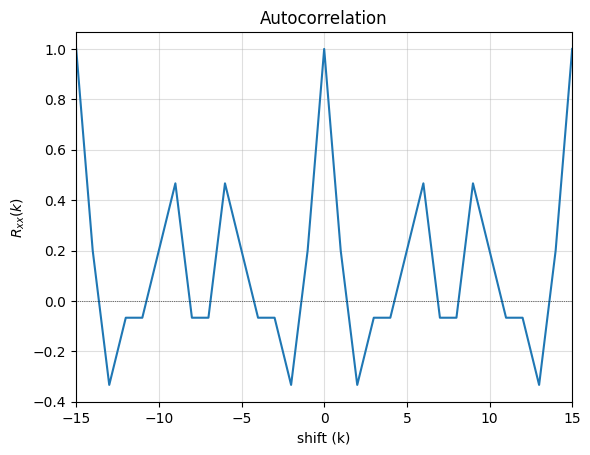

 - Pass?:  False



Failed one or more tests, check if feedback polynomial is primitive polynomial
1. Periodicity
------------------
 - Expected period = 2^M-1 = 15
 - Pass?:  True

2. Balance Property
-------------------
 - Number of 1s = Number of 0s+1 (in a period)
 - #1s =  8 	#0s =  7 := 8 = 1 + 7
 - Pass?:  True

3. Runlength Property
-------------------
 - Number of Runs of different lengths in a period should be of specific order, e.g. [4,2,1,1], that is 4 runs of length 1, 2 runs of length 2 and so on ..
 - Runs:  [4 2 1 1]
 - Pass?:  True

4. Autocorrelation Property
-------------------
 - Autocorrelation of a period should be noise-like, specifically, 1 at k=0, -1/m everywhere else 

 - Rxx(k):  [ 1.    -0.067 -0.067 -0.067 -0.067 -0.067 -0.067 -0.067 -0.067 -0.067
 -0.067 -0.067 -0.067 -0.067 -0.067  1.    -0.067 -0.067 -0.067 -0.067
 -0.067 -0.067 -0.067 -0.067 -0.067 -0.067 -0.067 -0.067 -0.067 -0.067
  1.   ]


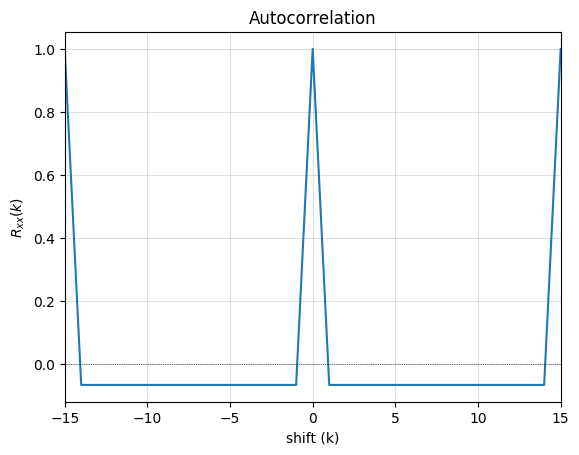

 - Pass?:  True



Passed all the tests


: 

In [7]:
L=LFSR(initstate=[1,1,1,0], fpoly=[4,2]) # Zły
result  = L.test_properties(verbose=2)

L=LFSR(initstate=[1,1,1,0], fpoly=[4,1]) # Dobry
result  = L.test_properties(verbose=2)

## Problem
Zaimplementuj szyfry strumieniowy binarnie addytywny o długości okresu 1024. Przetestuj poprawność jego działania.

Źródła:
1. https://lfsr.readthedocs.io/en/latest/LFSR_Examples.html#installation
1. https://www.partow.net/programming/polynomials/index.html
1. https://pl.wikipedia.org/wiki/Rejestr_przesuwaj%C4%85cy_z_liniowym_sprz%C4%99%C5%BCeniem_zwrotnym
1. https://pl.wikipedia.org/wiki/Szyfr_strumieniowy